# Sprint 2 DS 4003
## Olivia Richine

### 1. Link to dataset about sleep and health

##### I want to do an internactive app about sleep and health. I found a fairly rich survey dataset from a Cornell Study.

Link to data https://ropercenter.cornell.edu/ipoll/study/31115353

### 2. Import dataset

In [453]:
import pandas as pd
import matplotlib.pyplot as plt

In [454]:
csv_file_path = '/Users/oliviarichine/Documents/DS 4003/31115353.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path, encoding='latin1')

# Display the first few rows of the DataFrame
data.head()

,caseid,market,region,timezone,state,division,qs1,qs2,qs3,q1,...,q56f,q56g,q56h,q5701,q58,q59,q60a01,d101,d2,d3
0,1,mid_2,Mid West,C,MO,4,1,Female,Married,6:00 AM  6:14 AM,...,No,No,No,Retired,,,,1,067,Rural
1,2,ne_2,Northeast,E,PA,2,1,Female,Divorced,5:45 AM  5:59 AM,...,No,No,No,Working full-time,Regular day shifts,045,3,1,050,Suburban
2,3,south_1,South,E,FL,5,1,Male,Divorced,12:00 PM (Noon)  5:59 PM,...,Yes,No,No,Working full-time,Regular evening shifts,040,6,1,030,Urban
3,4,west_1,West,M,UT,8,1,Female,Married,7:30 AM  7:44 AM,...,No,No,No,A homemaker,,,,1,025,Suburban
4,5,west_2,West,M,UT,8,1,Male,Married,5:45 AM  5:59 AM,...,No,No,No,Working full-time,Rotating shifts,060,1,1,Refused,Refused


### 3. Why this data and data provenance

I chose this data because it comes from a reliable source and features a large array of survey data. My goal is to make an application that forms some conslusions about sleep and overall health. Some other alternate datasets only focused on people with disorered sleeping or heart conditions, which I think was too specific for my project. Some others were experiment data that only had 20 participants. I thought that this dataset had the most variety among questions while still having a large, diverse sample. 

Survey is sponsered by the National Sleep Foundation by the Organization WB&A Market Research. Titled "National Sleep Foundation: 2005 Sleep in America® Poll - Adult Sleep Habits & Styles"

The study dates are from Sep 2004 to Nov 2004.

Geographic Coverage: United States

Sample size: 1506

No. of Variables: 114

Abstract of study: 
Sleep schedule (7); habits before sleep (10); objects in your bedroom (1); time it takes to fall asleep (1); with whom do you prefer to sleep (2); sleep problems/disorders (7); naps during the week (2); quality of sleep (2); health care (3); medications and sleep-aids (5); daytime sleepiness (3); amount of sleep needed in order to feel functional (2); what wakes you up in the morning (1); sleepiness affecting work (2); lateness related to sleepiness (2); sleepiness affecting sexual relationships (1); impact of violent programs on sleep (1); concern over current events (2); agree/disagree with statements about sleep issues (4); morning or evening person (1); alcohol consumption (1); drowsiness while driving (3); medical conditions (8); employment and volunteer commitments (2).

The questionaire file is linked in a downloadable pdf file. A csv file of the raw data is also in the downloads folder. This allows for easy reproducibility. 

The data comes from Cornell website and seems to be of very high quality with credible sponsers and resources. 

The questions are very detailed and consent was gathered from participants.

Citation for data:
National Sleep Foundation. National Sleep Foundation: 2005 Sleep in America® Poll - Adult Sleep Habits & Styles. (Dataset, Version 2). Cornell University, Ithaca, NY: Roper Center for Public Opinion Research, Sep-20-2004. Web. Feb-23-2024. doi:10.25940/ROPER-31115353

DOI link: https://doi.org/10.25940/ROPER-31115353

### 4. Clean and prepare data

In [455]:
# look at the info to get general breakdown of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Columns: 114 entries, caseid to d3
dtypes: float64(1), int64(3), object(110)
memory usage: 1.3+ MB


In [456]:
# renaming columns based on what questions are asking (look at questionaire for info)
# Dictionary specifying the old and new column names
new_column_names = {
    'qs1': 'above_18',
    'qs2': 'gender',
    'qs3': 'marital_status',
    'qs4': 'region',
    'q1': 'work_wakeup_time',
    'q2': 'work_bed_time',
    'q3': 'work_sleep_hours',
    'q4': 'nonwork_wakeup_time',
    'q5': 'nonwork_bed_time',
    'q6': 'nonwork_sleep_hours',
    'q6a_1': 'stay_up_later',
    'q6b_a': 'did_work',
    'q6b_b': 'watched_tv',
    'q6b_c': 'listened_to_music',
    'q6b_d': 'on_internet',
    'q6b_e': 'read',
    'q6b_f': 'had_sex',
    'q6b_g': 'exercised',
    'q6b_h': 'time_with_friends',
    'q6b_i': 'alcohol',
    'q6b_j': 'took_shower',
    'q6c_a': 'tv_in_bed',
    'q6c_b': 'computer_in_bed',
    'q6c_c': 'telephone_in_bed',
    'q6c_d': 'radio_in_bed',
    'q7': 'time_to_fall_asleep',
    'q801': 'sleep_with',
    'q901': 'prefer_sleep_with',
    'q1001': 'if_sleep_problem',
    'q11': 'think_sleep_problem',
    'q12': 'nap',
    'q13': 'nap_time',
    'q14a': 'difficulty_falling',
    'q14b': 'awake_during_night',
    'q14c': 'woke_too_early',
    'q14d': 'unrefreshed',
    'q15a': 'unpleasant_legs',
    'q15b': 'twitches',
    'q16': 'legs_at_night',
    'q17': 'snore',
    'q18': 'snore_noise',
    'q19': 'snore_often',
    'q20': 'snore_bother_others',
    'q21': 'quit_breathing',
    'q22': 'sleep_problem_impact',
    'q23a': 'sleep_separate_bc_problem',
    'q23b': 'alter_sleep_bc_problem',
    'q23c': 'earplugs_eyemask_bc_problem',
    'q24a': 'partner_difficulty_falling',
    'q24b': 'partner_wake_alot',
    'q24c': 'partner_wake_too_early',
    'q24d': 'partner_unrefreshed',
    'q25a': 'partner_snore',
    'q25b': 'partner_pause_breathing',
    'q25c': 'partner_unpleasant_legs',
    'q25d': 'partner_twitches',
    'q26': 'sleep_lost_bc_partner',
    'q27': 'sleep_disorder_effect_on_relationship',
    'q28': 'num_of_good_nights_sleep',
    'q29': 'doctor_asked_ab_sleep',
    'q3001': 'awakens_during_night',
    'q31': 'difficult_fall_back_asleep',
    'q32a': 'otc_meds_aid',
    'q32b': 'prescribed_meds_aid',
    'q32c': 'alcohol_aid',
    'q32d': 'eyemask_earplugs_aid',
    'q32e': 'melatonin_aid',
    'q33': 'feel_tired_after_sleep',
    'q34': 'feel_tired_at_wakeup_time',
    'q3501': 'wakeup_method',
    'q36': 'min_sleep_to_function',
    'q3701': 'late_work_bc_sleepy',
    'q38': 'missed_work_bc_sleepy',
    'q39': 'errors_at_work_bc_sleepy',
    'q40': 'missed_family_events_bc_sleepy',
    'q41': 'sex_relation_sleepy',
    'q4201': 'watch_violent',
    'q43': 'concern_current_events',
    'q44a': 'learn_to_function_wo_sleep',
    'q44b': 'doctors_should_discuss_sleep',
    'q44c': 'sleep_problems_are_bc_overweight',
    'q44d': 'poor_sleep_is_bc_health_problems',
    'q45': 'morning_person_or_evening',
    'q46': 'caffeine_per_day',
    'q47': 'alcohol_per_week',
    'q48': 'driven_drowsy',
    'q49': 'accident_tired',
    'q50': 'accident_tired_often',
    'q51': 'sleep_driving',
    'q52': 'sleep_driving_often',
    'q53': 'height',
    'q54': 'weight',
    'q55': 'smoke',
    'q56a': 'heart_disease',
    'q56b': 'arthritis',
    'q56c': 'diabetes',
    'q56d': 'heartburn',
    'q56e': 'depression',
    'q56f': 'anxiety_disorder',
    'q56g': 'lung_disease',
    'q56h': 'high_blood_pressure',
    'q5701': 'employment_status',
    'q58': 'work_schedule',
    'q59': 'week_hours_paid_job',
    'q60a01': 'occupation_company',
    'd101': 'race',
    'd2': 'age',
    'd3': 'area_describe',
}

# Rename columns using the rename() function
data = data.rename(columns=new_column_names)


In [457]:
# drop unnecessary columns
columns_to_drop = ['caseid', 'above_18', 'market','timezone', 'division','partner_difficulty_falling', 'partner_wake_alot', 'partner_wake_too_early', 'partner_unrefreshed', 'partner_snore', 'partner_pause_breathing', 'partner_unpleasant_legs', 'partner_twitches', 'sleep_lost_bc_partner', 'occupation_company', 'if_sleep_problem', 'legs_at_night']
data = data.drop(columns=columns_to_drop)

In [458]:
# looks at new columns
data.head()

,region,state,gender,marital_status,work_wakeup_time,work_bed_time,work_sleep_hours,nonwork_wakeup_time,nonwork_bed_time,nonwork_sleep_hours,...,depression,anxiety_disorder,lung_disease,high_blood_pressure,employment_status,work_schedule,week_hours_paid_job,race,age,area_describe
0,Mid West,MO,Female,Married,6:00 AM  6:14 AM,10:30 PM  10:44 PM,8,6:00 AM  6:14 AM,10:30 PM  10:44 PM,8,...,No,No,No,No,Retired,,,1,067,Rural
1,Northeast,PA,Female,Divorced,5:45 AM  5:59 AM,10:00 PM  10:14 PM,7,6:30 AM  6:44 AM,11:00 PM  11:14 PM,8,...,Yes,No,No,No,Working full-time,Regular day shifts,045,1,050,Suburban
2,South,FL,Male,Divorced,12:00 PM (Noon)  5:59 PM,2:00 AM  5:00 AM,7,12:00 PM (Noon)  5:59 PM,2:00 AM  5:00 AM,9,...,No,Yes,No,No,Working full-time,Regular evening shifts,040,1,030,Urban
3,West,UT,Female,Married,7:30 AM  7:44 AM,10:30 PM  10:44 PM,9,8:00 AM  8:14 AM,11:00 PM  11:14 PM,8,...,No,No,No,No,A homemaker,,,1,025,Suburban
4,West,UT,Male,Married,5:45 AM  5:59 AM,10:00 PM  10:14 PM,7,7:00 AM  7:14 AM,11:00 PM  11:14 PM,8,...,No,No,No,No,Working full-time,Rotating shifts,060,1,Refused,Refused


In [459]:
print(list(data.columns))

['region', 'state', 'gender', 'marital_status', 'work_wakeup_time', 'work_bed_time', 'work_sleep_hours', 'nonwork_wakeup_time', 'nonwork_bed_time', 'nonwork_sleep_hours', 'stay_up_later', 'did_work', 'watched_tv', 'listened_to_music', 'on_internet', 'read', 'had_sex', 'exercised', 'time_with_friends', 'alcohol', 'took_shower', 'tv_in_bed', 'computer_in_bed', 'telephone_in_bed', 'radio_in_bed', 'time_to_fall_asleep', 'sleep_with', 'prefer_sleep_with', 'think_sleep_problem', 'nap', 'nap_time', 'difficulty_falling', 'awake_during_night', 'woke_too_early', 'unrefreshed', 'unpleasant_legs', 'twitches', 'snore', 'snore_noise', 'snore_often', 'snore_bother_others', 'quit_breathing', 'sleep_problem_impact', 'sleep_separate_bc_problem', 'alter_sleep_bc_problem', 'earplugs_eyemask_bc_problem', 'sleep_disorder_effect_on_relationship', 'num_of_good_nights_sleep', 'doctor_asked_ab_sleep', 'awakens_during_night', 'difficult_fall_back_asleep', 'otc_meds_aid', 'prescribed_meds_aid', 'alcohol_aid', 'ey

In [460]:
print(data.describe())

# BMI looks way too high
# Sometimes they entered 98 (or 998) if the person refused question 
# and 99 (or 999) if the respondent didn't know
# Need to replace these with missing
data['work_sleep_hours'] = data['work_sleep_hours'].replace(['98', '99'], pd.NA)
data['nonwork_sleep_hours'] = data['nonwork_sleep_hours'].replace(['98', '99'], pd.NA)
data['min_sleep_to_function'] = data['min_sleep_to_function'].replace(['98', '99'], pd.NA)
data['bmi'] = data['bmi'].replace([98, 99], pd.NA)
data['week_hours_paid_job'] = data['week_hours_paid_job'].replace(['998', '999'], pd.NA)
data['age'] = data['age'].replace(['998', '999'], pd.NA)

data['caffeine_per_day'] = data['caffeine_per_day'].replace(["Don't Know", 'Refused'], pd.NA)
data['caffeine_per_day'] = data['caffeine_per_day'].replace('Less than one', '0.5')

data['alcohol_per_week'] = data['alcohol_per_week'].replace(["Don't Know", 'Refused'], pd.NA)
data['alcohol_per_week'] = data['alcohol_per_week'].replace('Less than one', '0.5')

               bmi
count  1506.000000
mean     29.843504
std      13.917881
min      12.014201
25%      23.694675
50%      26.678467
75%      30.510200
max      99.000000


In [461]:
# make all numeric functions
data['work_sleep_hours'] = pd.to_numeric(data['work_sleep_hours'], errors='coerce')
data['nonwork_sleep_hours'] = pd.to_numeric(data['nonwork_sleep_hours'], errors='coerce')
data['min_sleep_to_function'] = pd.to_numeric(data['min_sleep_to_function'], errors='coerce')
data['height'] = pd.to_numeric(data['height'], errors='coerce')
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
data['week_hours_paid_job'] = pd.to_numeric(data['week_hours_paid_job'], errors='coerce')
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['caffeine_per_day'] = pd.to_numeric(data['caffeine_per_day'], errors='coerce')
data['alcohol_per_week'] = pd.to_numeric(data['alcohol_per_week'], errors='coerce')

#Look at numeric columns
data.describe()
# Looks much better now!

,work_sleep_hours,nonwork_sleep_hours,min_sleep_to_function,caffeine_per_day,alcohol_per_week,height,weight,bmi,week_hours_paid_job,age
count,1466.000000,1488.000000,1458.000000,1498.000000,1492.000000,1496.000000,1462.000000,1457.000000,957.000000,1492.000000
mean,6.745157,7.394702,6.513134,2.760681,2.520442,67.177139,177.414501,27.517719,42.287356,49.002011
std,1.337932,1.555846,1.516081,3.621860,5.257464,4.087182,43.271921,5.818921,13.344877,15.997799
min,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,72.000000,12.014201,4.000000,18.000000
25%,6.000000,6.500000,6.000000,1.000000,0.000000,64.000000,145.000000,23.632137,40.000000,37.000000
50%,7.000000,7.500000,6.500000,2.000000,0.000000,67.000000,170.000000,26.617347,40.000000,48.000000
75%,8.000000,8.000000,8.000000,4.000000,3.000000,70.000000,200.000000,30.196523,50.000000,60.000000
max,14.000000,16.000000,14.000000,70.000000,60.000000,79.000000,402.000000,65.061983,100.000000,92.000000


In [462]:
# Lots of misentries in this column
# Replace messed up entries
replacement = {'11': 'Noise & Wake up for no apparent reason', '14': 'Noise & Thinking about work, something else', '13': 'Noise & Stress', '15': 'Noise & Someone else', '18': 'Noise & World events', '16': 'Noise & Pain/Discomfort', '12': 'Noise & Light', '17': 'Noise & Nightmares', '20': 'Light', '21': 'Noise & Light', '22': 'Light', '24': 'Light & Thinking about work, something else'}
data['awakens_during_night'] = data['awakens_during_night'].replace(replacement)

data['awakens_during_night'].value_counts()
# Much more comprehensive now

awakens_during_night
Noise                                          567
The need to go to the bathroom                 270
Nothing awakens me at night                    182
Someone else                                   173
Pain/Discomfort                                 64
Noise & Wake up for no apparent reason          45
Don't Know                                      34
Wake up for no apparent reason                  34
Nightmares                                      24
Noise & Thinking about work, something else     18
Noise & Stress                                  16
Thinking about work, something else             15
Light                                           12
Stress                                          11
Noise & Someone else                             8
Something else                                   7
Noise & Pain/Discomfort                          7
Noise & Light                                    7
Noise & World events                             5
Noise & Ni

In [463]:
# Lots of misentries in this column
# Replace messed up entries
replacement = {'11': 'Alarm clock', '12': 'Alarm clock & Bed partner', '9': "Don't Know", '8': 'Refused', '16': 'Alarm clock & Radio/Television', '10': 'Alarm clock', '13': 'Alarm clock & Children', '15': 'Alarm clock & Pet', '14': 'Alarm clock & Light'}
data['wakeup_method'] = data['wakeup_method'].replace(replacement)

data['wakeup_method'].value_counts()
# Much more comprehensive now

wakeup_method
Alarm clock                       741
Wake up on own                    507
Children                           65
Bed partner                        56
Light                              41
Pet                                25
Radio/Television                   24
Don't Know                         19
Refused                             8
Alarm clock & Bed partner           7
Other                               4
Alarm clock & Radio/Television      3
Alarm clock & Children              3
Alarm clock & Pet                   2
Alarm clock & Light                 1
Name: count, dtype: int64

In [464]:
# Values for race are represented by numbers reported in questionaire
# Change numbers to actual race value to be easier to understand.
replacement = {
    '1': 'White',
    '2': 'Black/African-American',
    '3': 'Hispanic',
    '4': 'White & Hispanic',
    '5': 'Black & Hispanic',
    '6': 'Other'
}
# Use map to convert race values
data['race'] = data['race'].replace(replacement)

# Diplay new race values
data['race'].value_counts()
# Much more comprehensive now

race
White                     1248
Black/African-American     130
Hispanic                    61
Refused                     23
White & Hispanic            19
Other                       15
Black & Hispanic            10
Name: count, dtype: int64

In [465]:
# remove all initial spaces before entries
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [466]:
# Make all blank space entries into missing
data = data.replace('', pd.NA)

In [467]:
# Replace 99 with Don't know
data['feel_tired_after_sleep'] = data['feel_tired_after_sleep'].replace('99', 'Don t know')
data['feel_tired_at_wakeup_time'] = data['feel_tired_at_wakeup_time'].replace('99', 'Don t know')

In [468]:
# I looked at the value counts of every column 
# one by one to catch any misentries and errors

In [469]:
data.to_csv('data.csv')

### 5. Exploratory Analysis

In [470]:
# How many observations there are
len(data)

1506

In [471]:
# Look at categorical columns

# I looked at all value counts of categorical variables manually
# too many to display

In [472]:
# look at number of unique variables in categorical column
data.select_dtypes(include=['object']).nunique()

# If you look at questionaire, can see possible choices

region                  4
state                  49
gender                  2
marital_status          7
work_wakeup_time       27
                       ..
high_blood_pressure     4
employment_status      11
work_schedule           8
race                    7
area_describe           5
Length: 87, dtype: int64

In [473]:
# Count missing data
data.isnull().sum()

# sometimes certain answers make them skip other questions, so not concerned ab nulls

# week_hours_paid_job is the number of hours in a week the person spends at their paying job, 
# this is skipped if they don't work, so a lot of missing, but not concerned

region                   0
state                    0
gender                   0
marital_status           0
work_wakeup_time         0
                      ... 
work_schedule          520
week_hours_paid_job    549
race                     0
age                     14
area_describe            0
Length: 97, dtype: int64

       work_sleep_hours  nonwork_sleep_hours  min_sleep_to_function  \
count       1466.000000          1488.000000            1458.000000   
mean           6.745157             7.394702               6.513134   
std            1.337932             1.555846               1.516081   
min            0.000000             0.000000               0.000000   
25%            6.000000             6.500000               6.000000   
50%            7.000000             7.500000               6.500000   
75%            8.000000             8.000000               8.000000   
max           14.000000            16.000000              14.000000   

       caffeine_per_day  alcohol_per_week       height       weight  \
count       1498.000000       1492.000000  1496.000000  1462.000000   
mean           2.760681          2.520442    67.177139   177.414501   
std            3.621860          5.257464     4.087182    43.271921   
min            0.000000          0.000000    39.000000    72.000000   
25%  

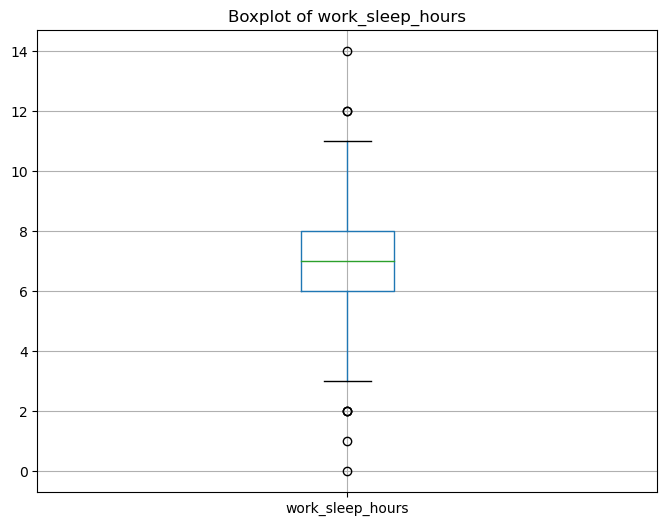

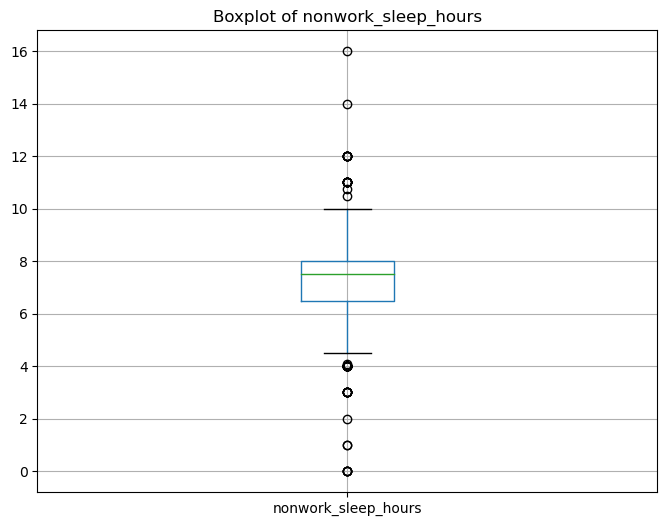

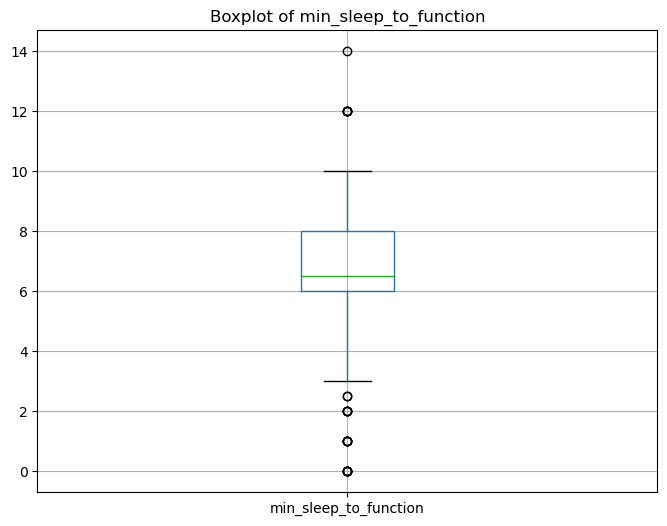

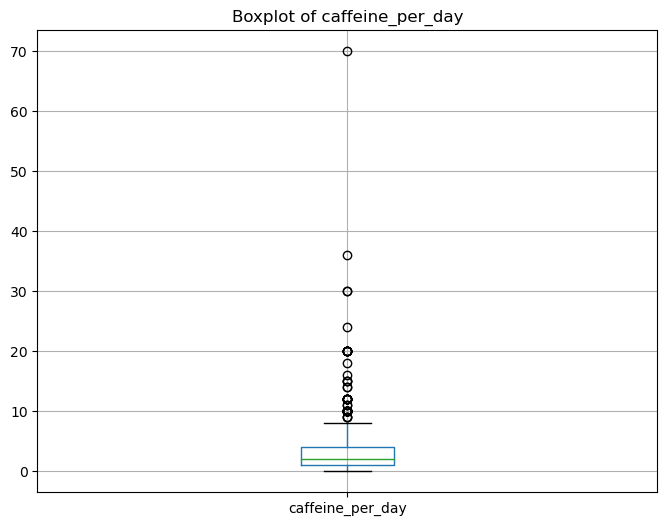

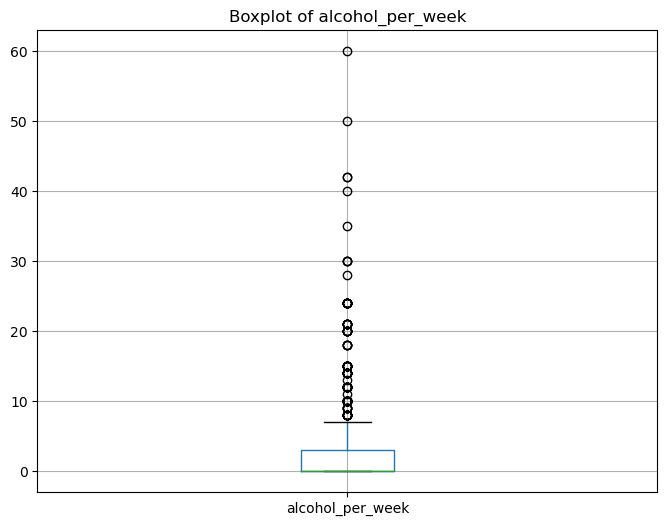

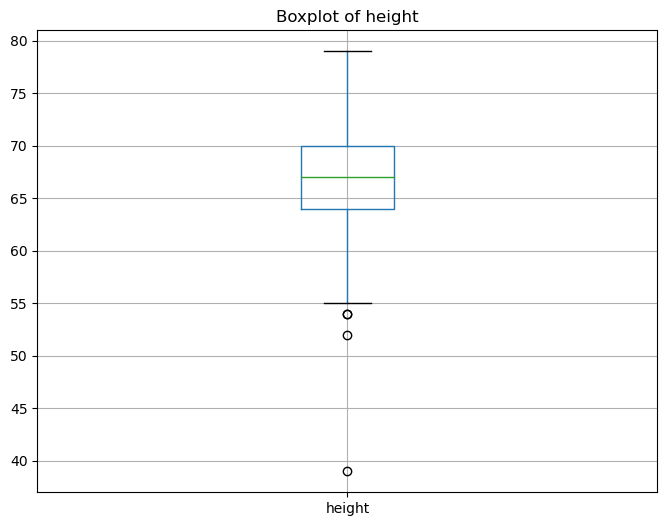

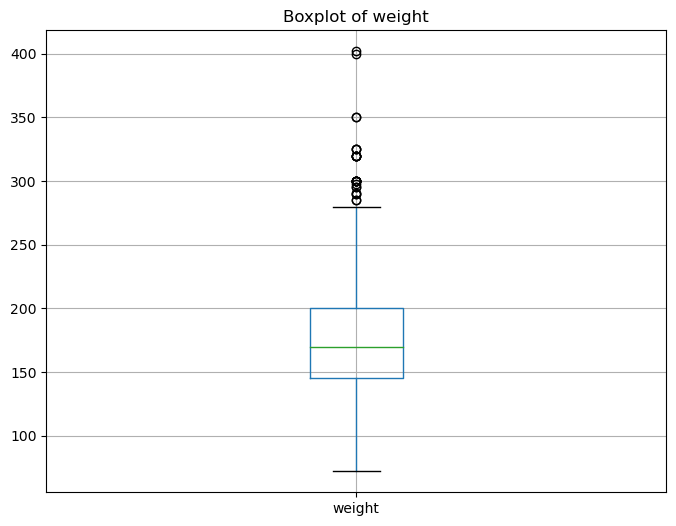

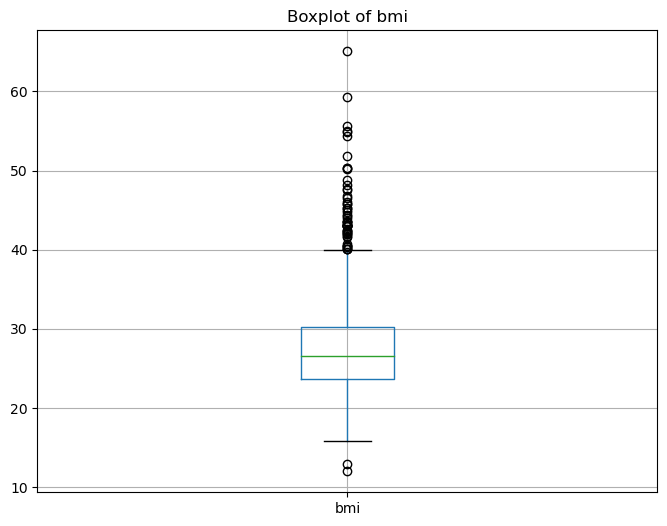

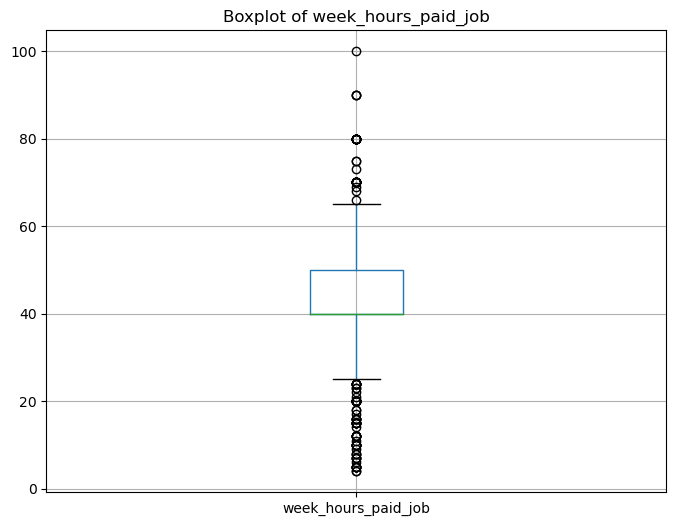

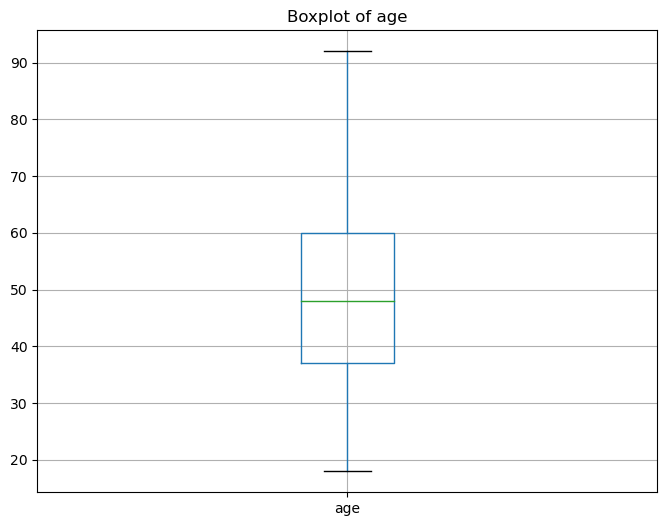

In [474]:
# Distributions of continuous variables and boxplots for outlier display
print(data.describe())

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# seems like there are many outliers in sleep hours, minimum hours of sleep to function
# height, weight, bmi, and number of hours worked per week
    
# Have outliers that sleep a lot and outliers that sleep a little
    
# Wondering if there will be any interesting relations between sleep and weight and bmi 
# since there is a large sample group of overweight respondents
    
# Some very low heights, I wonder if this is an error, could drop entry later

### 6. Data Dictionary

In [475]:
# Your data dictionary
data_dictionary = {
    'region': 'Geographical region where the individual resides.',
    'state': 'State where the individual resides.',
    'gender': 'Gender of the individual.',
    'marital_status': 'Marital status of the individual.',
    'work_wakeup_time': 'Time at which the individual wakes up on workdays.',
    'work_bed_time': 'Time at which the individual goes to bed on workdays.',
    'work_sleep_hours': 'Number of hours the individual sleeps on workdays.',
    'nonwork_wakeup_time': 'Time at which the individual wakes up on non-workdays.',
    'nonwork_bed_time': 'Time at which the individual goes to bed on non-workdays.',
    'nonwork_sleep_hours': 'Number of hours the individual sleeps on non-workdays.',
    'stay_up_later': 'How often the individual tends to stay up later than intended.',
    'did_work': 'How often the individual worked before bed.',
    'watched_tv': 'How often the individual watched TV before bed.',
    'listened_to_music': 'How often the individual listened to music before bed.',
    'on_internet': 'How often the individual used the internet before bed.',
    'read': 'How often the individual read before bed.',
    'had_sex': 'How often the individual had sex before bed.',
    'exercised': 'How often the individual exercised before bed.',
    'time_with_friends': 'How often the individual spent with friends before bed.',
    'alcohol': 'How often the individual consumed alcohol before bed.',
    'took_shower': 'How often the individual took a shower before bed.',
    'tv_in_bed': 'Whether the individual has a TV in bedroom.',
    'computuer_in_bed': 'Whether the individual has a computer in bedroom.',
    'telephone_in_bed': 'Whether the individual has a telephone in bedroom.',
    'radio_in_bed': 'Whether the individual has a radio in bedroom.',
    'time_to_fall_asleep': 'How long it takes for the individual to fall asleep.',
    'sleep_with': 'Who the individual sleeps with (e.g., alone, with sig other.',
    'prefer_sleep_with': 'Who the individual prefers to sleep with.',
    'think_sleep_problem': 'Whether the individual thinks they have a sleep problem.',
    'nap': 'How many times the individual takes naps per week.',
    'nap_time': 'Duration of naps.',
    'difficulty_falling': 'How often the individual has difficulty falling asleep.',
    'awake_during_night': 'How often the individual wakes up during the night.',
    'woke_too_early': 'How often the individual wakes up too early.',
    'unrefreshed': 'How often the individual wakes up feeling unrefreshed.',
    'unpleasant_legs': 'How often the individual experiences unpleasant sensations in their legs.',
    'twitches': 'How often the individual experiences twitches during sleep.',
    'snore': 'Whether the individual snores.',
    'snore_noise': 'Noise level of the snoring.',
    'snore_often': 'How often the individual snores.',
    'snore_bother_others': 'Whether the snoring bothers others.',
    'quit_breathing': 'How often the individual stops breathing during sleep.',
    'sleep_problem_impact': 'Impact of sleep problems on the individuals life.',
    'sleep_separate_bc_problem': 'Whether the individual sleeps separately from their partner because of sleep problems.',
    'alter_sleep_bc_problem': 'How the individual alters their sleep schedule because of sleep problems.',
    'earplugs_eyemask_bc_problem': 'Whether the individual uses earplugs or eyemask because of sleep problems.',
    'sleep_disorder_effect_on_relationship': 'Effect of sleep disorders on the individual\'s relationships.',
    'num_of_good_nights_sleep': 'How often the individual has a good night of sleep.',
    'doctor_asked_ab_sleep': 'Whether a doctor has asked the individual about their sleep.',
    'awakens_during_night': 'What awakens the individual during the night.',
    'difficult_fall_back_asleep': 'How difficult the individual finds it to fall back asleep.',
    'otc_meds_aid': 'How often the individual uses over-the-counter medications to aid sleep.',
    'prescribed_meds_aid': 'How often the individual uses prescribed medications to aid sleep.',
    'alcohol_aid': 'How often the individual uses alcohol to aid sleep.',
    'eyemask_earplugs_aid': 'How often the individual uses eyemask or earplugs to aid sleep.',
    'melatonin_aid': 'How often the individual uses melatonin to aid sleep.',
    'feel_tired_after_sleep': 'How often the individual feels tired after sleeping.',
    'feel_tired_at_wakeup_time': 'How often the individual feels tired at wakeup time.',
    'wakeup_method': 'Method the individual uses to wake up.',
    'min_sleep_to_function': 'Minimum amount of sleep required for the individual to function.',
    'late_work_bc_sleepy': 'Whether the individual is late to work because of feeling sleepy.',
    'missed_work_bc_sleepy': 'How often the individual has missed work because of feeling sleepy.',
    'errors_at_work_bc_sleepy': 'How often the individual makes errors at work because of feeling sleepy.',
    'missed_family_events_bc_sleepy': 'How often the individual has missed family events because of feeling sleepy.',
    'sex_relation_sleepy': 'Whether sleepiness affects the individuals sexual relations.',
    'watch_violent': 'Whether the watching violent content impacts sleep.',
    'concern_current_events': 'How concerned the individual is about current events.',
    'learn_to_function_wo_sleep': 'Whether the individual has learned to function without adequate sleep.',
    'doctors_should_discuss_sleep': 'Whether they think doctors should discuss sleep with patients.',
    'sleep_problems_are_bc_overweight': 'Whether they think sleep problems are because of being overweight.',
    'poor_sleep_is_bc_health_problems': 'Whether they think poor sleep is because of health problems.',
    'morning_person_or_evening': 'Whether the individual is a morning person or an evening person.',
    'caffeine_per_day': 'Amount of caffeine consumed per day.',
    'alcohol_per_week': 'Amount of alcohol consumed per week.',
    'driven_drowsy': 'How often the individual has driven while feeling drowsy.',
    'accident_tired': 'Whether the individual has had an accident because of feeling tired.',
    'accident_tired_often': 'How often the individual has had an accident because of feeling tired.',
    'sleep_driving': 'Whether the individual has fallen asleep driving.',
    'sleep_driving_often': 'How often the individual has fallen asleep driving.',
    'height': 'Height of the individual.',
    'weight': 'Weight of the individual.',
    'bmi': 'Body Mass Index (BMI) of the individual.',
    'smoke': 'How oftenthe individual smokes.',
    'heart_disease': 'Whether the individual has heart disease.',
    'arthritis': 'Whether the individual has been diagnosed with arthritis.',
    'diabetes': 'Whether the individual has been diagnosed with diabetes.',
    'heartburn': 'Whether the individual experiences heartburn.',
    'depression': 'Whether the individual has been diagnosed with depression.',
    'anxiety_disorder': 'Whether the individual has been diagnosed with an anxiety disorder.',
    'lung_disease': 'Whether the individual has been diagnosed with a lung disease.',
    'high_blood_pressure': 'Whether the individual has been diagnosed with high blood pressure.',
    'employment_status': 'The employment status of the individual.',
    'work_schedule': 'The schedule of the individuals work hours.',
    'week_hours_paid_job': 'The number of hours the individual works in a typical week in their paid job.',
    'race': 'The race or ethnicity of the individual.',
    'age': 'The age of the individual.',
    'area_describe': 'Description of the area where the individual resides.'
}

data_dictionary = pd.DataFrame(data_dictionary.items(), columns=['column_name', 'description'])

data_dictionary.head()


,column_name,description
0,region,Geographical region where the individual resides.
1,state,State where the individual resides.
2,gender,Gender of the individual.
3,marital_status,Marital status of the individual.
4,work_wakeup_time,Time at which the individual wakes up on workd...


### 7. Brainstrom UI

1. Dropdowns: have dropdowns that allow you to select certain regions, states, genders, etc to limit the data to
2. Sliders: have sliders to limit height, weight, bmi of individuals so that users can make the results similar to themselves
3. Radio buttons: have radio buttons for categorical choices like morning or evening person, anxiety, depression, etc.
4. Bar charts: have bar charts to visualize relationships between categorical variables
5. Scatter plots: have scatter plots to look at numeric variables like bmi and sleep hours.
6. Pie charts: have pie charts to see distributions of variables such as anxiety disorder, sleep problems, depression, etc.
7. Correlation heatmap of variables with sleep hours, see which variables most effect sleep and vice versa.

### 8. Brainstorm Visualizations

1. Barchart of sleep hours by marital status:
    Display average sleep hours in a barchart with marital staus on the x-axis and average sleep on the y-axis
2. Scatter Plot of BMI vs. Sleep Hours:
    See if there is a relationship between BMI and sleep hours with sleep hours on x-axis and BMI on y-axis.
3. Bar chart of TV watching before bed and age.
    See distribution of people who watch tv before bed and age with age on x-axis and y-axis as count of people who watch tv.
4. Boxplot of sleep hours by employment status:
    See if there is a relationship between sleep hours and employment status with a boxplot with employment status categories on x-axis and sleep hours on y-axis.
5. Bar chart of sleep problems impact by employment status
    Visualize amount of people who report being impacted by sleep problems by employment status to see if there is a relationship. X-axis employment status and y-axis count of people.
6. Pie chart of people's sleeping preferences and choices. Show how many people prefer to sleep alone vs with a partner. Show distribution of how many people take melatonin before bed, use eye masks, etc. 
